In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import cv2

# Enhancing images with digits

In [2]:
(train_images,train_labels),(test_images,test_labels) = tf.keras.datasets.mnist.load_data()

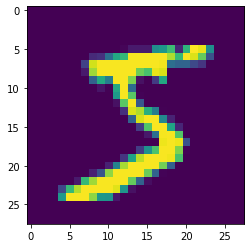

In [3]:
plt.imshow(train_images[0])

In [4]:
def enhance(image):
    gmage=[]
    maxw = 1.4 #weight of pixel with more detail
    minw = 0.6 #weight of pixel with less detail
    threshold = 100 #to remove extra noise
    for x in range(len(image)):
        temp=[]
        for y in range(len(image)):
            temp.append(image[x][y])
            if(y<(len(image)-1)):
                pix_1 = (((max(image[x][y],image[x][y+1])*maxw)+((min(image[x][y],image[x][y+1]))*minw))/2)
                temp.append(0 if pix_1>0 and pix_1<threshold else pix_1)
        gmage.append(temp)
        if(x<(len(image)-1)):
            temp=[]
            for k in range(len(image)):
                pix_2 = (max(image[x][k],image[x+1][k])*maxw + min(image[x][k],image[x+1][k])*minw)/2
                temp.append(0 if pix_2>0 and pix_2<threshold else pix_2)
                if(k<(len(image)-1)):
                    pix_3 = ((max(image[x][k],image[x+1][k+1])*maxw + min(image[x][k],image[x+1][k+1])*minw)/2)
                    temp.append(0 if pix_3>0 and pix_3<threshold else pix_3)
            gmage.append(temp)
    gmage = np.array(gmage).astype(float)
    return gmage

In [5]:
image1 = train_images[0]
numOfTimes = 4
for e in range(numOfTimes):
    image1 = enhance(image1)

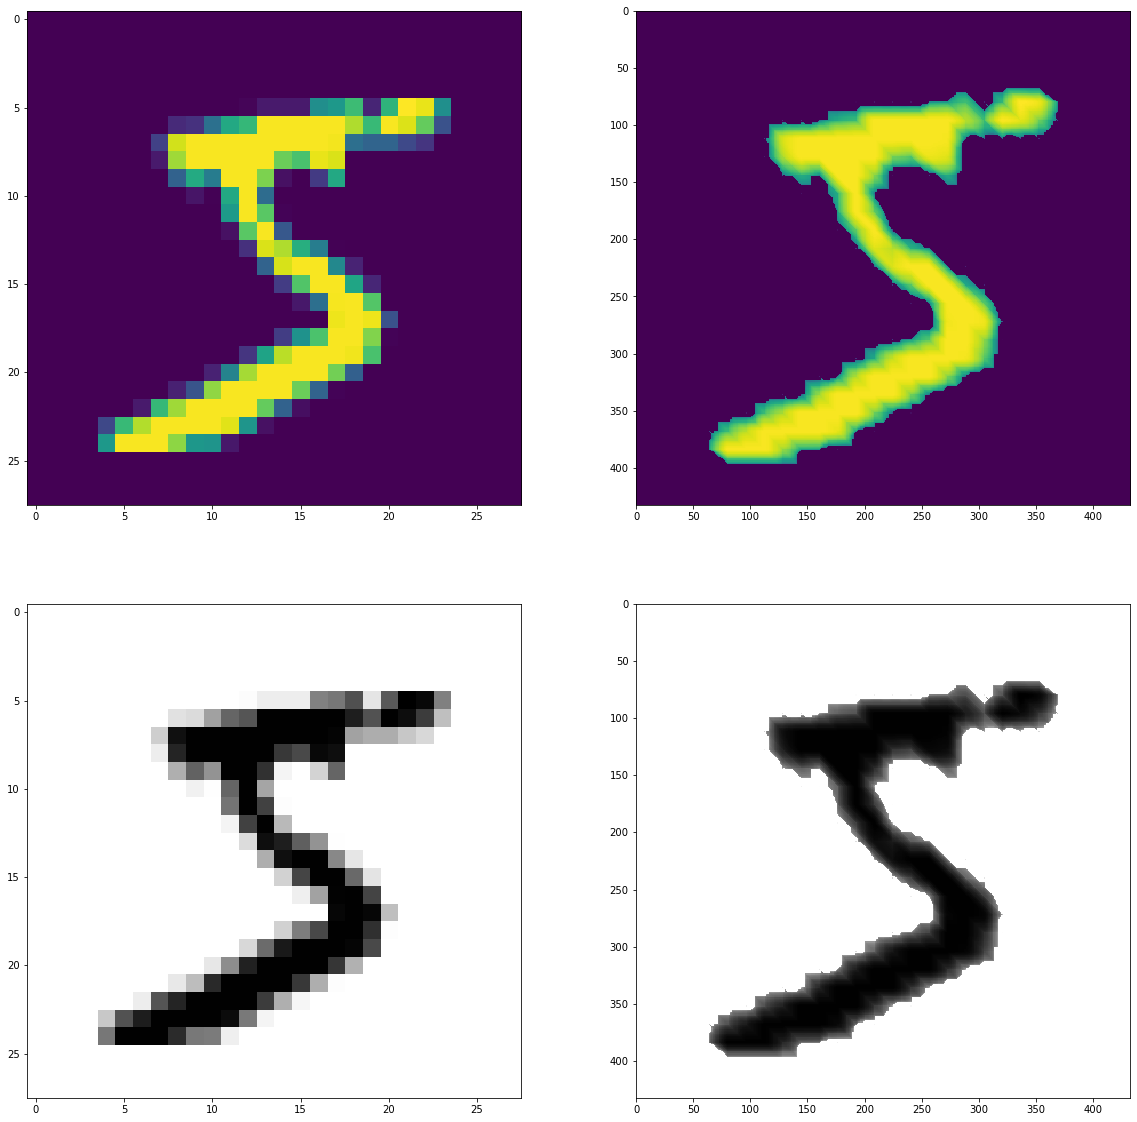

In [6]:
fig_1,axes = plt.subplots(2,2,figsize=(20,20))
axes[0,0].imshow(train_images[0])
axes[0,1].imshow(image1)
axes[1,0].imshow(train_images[0],cmap=plt.cm.binary)
axes[1,1].imshow(image1,cmap=plt.cm.binary)

# Enhancing General(rgb) Images

In [7]:
train_images2 = []
train_images2.append(mpimg.imread('sample.png'))

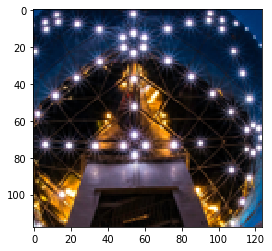

In [8]:
plt.imshow(train_images2[0])

In [9]:
def enhance(image):
    gmage=[]
    for x in range(len(image)):
        temp=[]
        for y in range(len(image)):
            temp.append(image[x][y])
            if(y<(len(image)-1)):
                pix_1 = ((image[x][y]+image[x][y+1])/2)
                temp.append(pix_1)
        gmage.append(temp)
        if(x<(len(image)-1)):
            temp=[]
            for k in range(len(image)):
                pix_2 = ((image[x][k]+image[x+1][k])/2)
                temp.append(pix_2)
                if(k<(len(image)-1)):
                    pix_3 = ((image[x][k]+image[x+1][k+1])/2)
                    temp.append(pix_3)
            gmage.append(temp)
    gmage = np.array(gmage).astype(float)
    return gmage

In [10]:
image2 = train_images2[0]
for e in range(4):
    templist = [x for x in (image2[:,:,0],image2[:,:,1],image2[:,:,2])]
    for i in range(len(templist)):
        templist[i] = enhance(templist[i])
    image2 = cv2.merge((templist))

In [11]:
kernel = np.array([[0,-1,-0], [-1,5,-1], [0,-1,0]]) #sharpen
image2 = cv2.filter2D(image2, -1, kernel) #apply filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


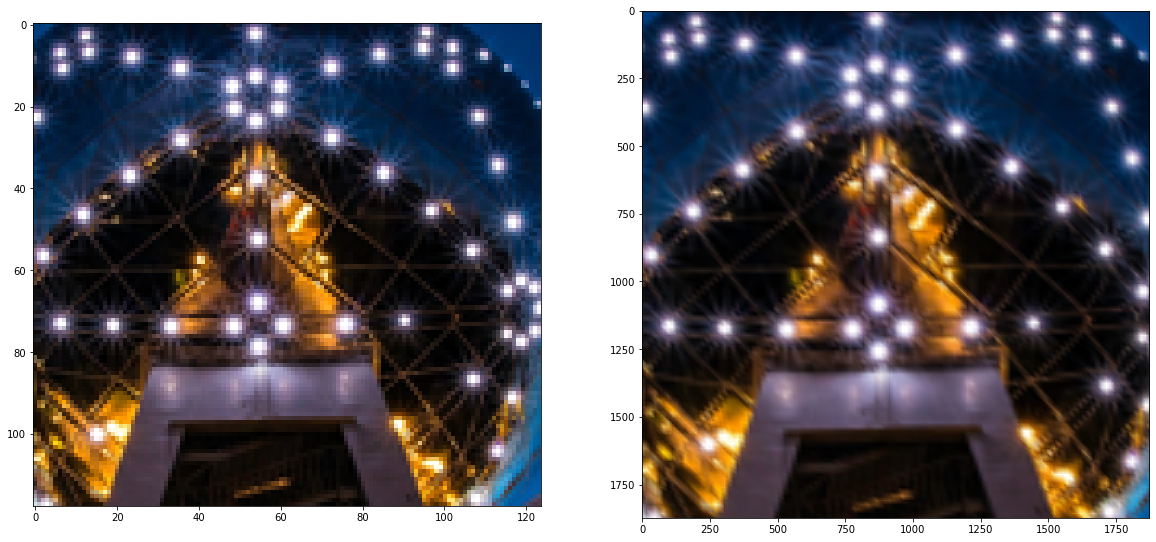

In [12]:
fig_1,axes = plt.subplots(1,2,figsize=(20,20))
axes[0].imshow(train_images2[0])
axes[1].imshow(image2)